In [1]:
%matplotlib inline
import os, pickle, string
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from statannotations.Annotator import Annotator

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
lp001_pl = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PL")
lp001_pl["Cross"] = "LP001×ZJ618"
lp001_pc = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PC")
lp001_pc["Cross"] = "LP001×ZJ618"
lp001_psu = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PSugar")
lp001_psu["Cross"] = "LP001×ZJ618"
lp001_pst = pd.read_excel(os.path.join(RAW_PATH, "LP001-ZJ618.xlsx"), sheet_name="PStarch")
lp001_pst["Cross"] = "LP001×ZJ618"

lp012_pl = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PL")
lp012_pl["Cross"] = "LP012×ZJ618"
lp012_pc = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PC")
lp012_pc["Cross"] = "LP012×ZJ618"
lp012_psu = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PSugar")
lp012_psu["Cross"] = "LP012×ZJ618"
lp012_pst = pd.read_excel(os.path.join(RAW_PATH, "LP012-ZJ618.xlsx"), sheet_name="PStarch")
lp012_pst["Cross"] = "LP012×ZJ618"

data_pl = pd.concat([lp001_pl, lp012_pl], axis=0, ignore_index=True)
data_pc = pd.concat([lp001_pc, lp012_pc], axis=0, ignore_index=True)
data_psu = pd.concat([lp001_psu, lp012_psu], axis=0, ignore_index=True)
data_pst = pd.concat([lp001_pst, lp012_pst], axis=0, ignore_index=True)

In [19]:
data_pl["Cross"].unique()

array(['LP001×ZJ618', 'LP012×ZJ618'], dtype=object)

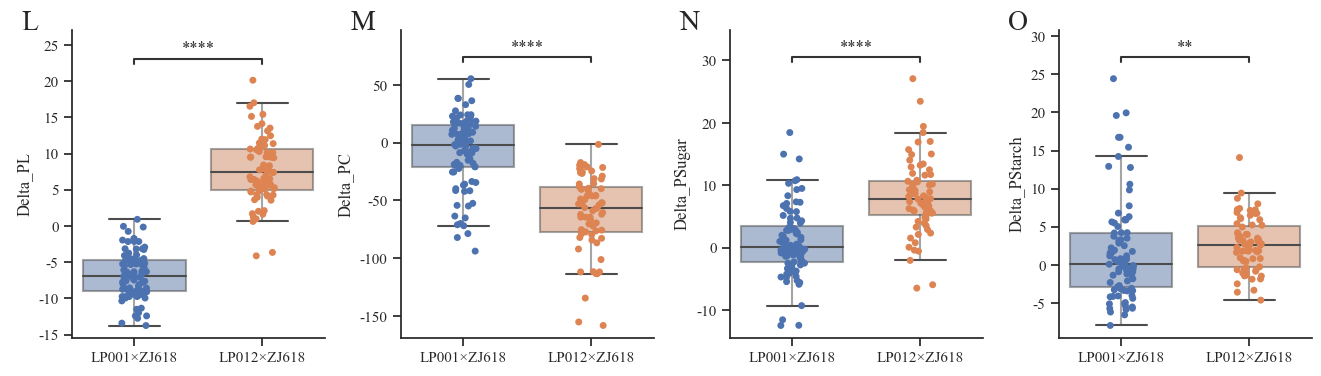

In [50]:
sns.set(font_scale=1, style="ticks")

letter_list = ['L','M','N','O']

def letter_annotation(ax, xoffset, yoffset, letter):

    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
            size=20, weight='bold')


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
fig.subplots_adjust(wspace=0.3)

data_list = [data_pl, data_pc, data_psu, data_pst]
data_item_list = ["Delta_PL", "Delta_PC", "Delta_PSugar", "Delta_PStarch"]
for i in range(0, 4):
    sns.boxplot(data_list[i], x="Cross", y=data_item_list[i], boxprops=dict(alpha=0.5), whiskerprops=dict(alpha=0.5), showfliers=False, ax=axes[i])
    
    sns.stripplot(data_list[i], x="Cross", y=data_item_list[i], hue="Cross", legend=False, ax=axes[i])
    axes[i].set(xlabel="")

    axes[i].spines.right.set_visible(False)
    axes[i].spines.top.set_visible(False)

    annotator = Annotator(axes[i], [('LP001×ZJ618', 'LP012×ZJ618')], 
                          data=data_list[i], x="Cross", y=data_item_list[i])
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
    annotator.apply_and_annotate()

    letter_annotation(axes[i], -0.2, 1., letter_list[i])

plt.savefig(os.path.join(FIG_PATH, 'Fig_2L-O_plot_cross_result.pdf'), format='pdf', bbox_inches='tight', transparent=True)